# Numerische Methoden für Differentialgleichungen
## Aufgabenblatt 1
*gelöst von Stollmayer Max*

### Aufgabe 1
Das folgende System 2. Ordnung

\begin{cases}
    \ddot{y}_1 = t^2 - \dot{y}_1 - y_2^2 \\
    \ddot{y}_2 = t + \dot{y}_2 + y_1^3 \\
    y_1(0)=0, \dot{y}_1(0)=1, y_2(0)=1, \dot{y}_2(0)=0
\end{cases}

lässt sich in ein System 1. Ordnung umschreiben, durch das Einführen der neuen Variablen $y_3$ und $y_4$. Für die gilt nämlich $\ddot{y}_1 = \dot{y}_3$ bzw. $\ddot{y}_2 = \dot{y}_4$. Das umgeschriebene System ist:

\begin{cases}
    \dot{y}_1 = y_3 \\
    \dot{y}_2 = y_4 \\
    \dot{y}_3 = t^2 - y_3 - y_2^2 \\
    \dot{y}_4 = t + y_4 + y_1^3 \\
    y_1(0)=0, y_2(0)=1, y_3(0)=1, y_4(0)=0
\end{cases}

D.h. Systeme höherer Ordnung lassen sich immer zu einem höher dimensionalen System 1. Ordnung umschreiben. Das erlaubt uns nun Verfahren für diese zu entwickeln, wie das explizite Euler-Verfahren im folgenden Teil.

### Aufgabe 2

Implementierung des expliziten Euler-Verfahrens für ODE Systeme 1. Ordnung.

#### Konstruktion

Wir betrachten das Cauchy-Problem
$\begin{cases} y'(t) = f(t,\, y(t)) \\ y(t_0) = y_0 \end{cases}$
für $f$ gleichmäßig Lipschitz-stetig auf $\mathbb{R}$ bzgl. $y$.

Durch Taylorentwicklung von $y$ bei $t$ erhalten wir $$y(t+h) = y(t) + h \ y'(t) + \frac{h^2 \ y''(\xi_h)}{2}$$ für eine Gitterkonstante $h>0$ und ein $\xi_h \in [t,\, t+h]$. Substituieren wir nun $y'(t_n) = f(t_n,\, y(t_n))$ und verlieren das Restglied, dann ergibt sich ein Schritt vom expliziten Euler-Verfahren: $y(t+h) \simeq y(t) + h \ f(t,\, y(t))$. Diesen Schritt können wir nun auf die Punkte $t_n = t_0 + n\ h$ einer äquidistanten Zerlegung eines Intervalls $[a = t_0, t_N=b]$ anwenden und bekommen so das rekursive Verfahren $y_{n+1} = y_n + h \ f(t_n,\, y_n)$ mit $y_n \simeq y(t_n)$.

#### Konvergenz

Der lokale Abschneidefehler ist die Differenz zwischen der exakten Lösung und dem Resultat aus einem Schritt, der sich an einem Punkt $t_{n+1}$ ergibt, was genau durch das Restglied der Taylorentwicklung gegeben ist: $$\tau_{n+1} := y(t_n+h) - \big( y(t_n) + h \ f(t_n,\, y(t_n)) \big) = \frac{h^2 \ y''(\xi_h)}{2}$$

Der globale Abschneidefehler besteht nun aus der Differenz zwischen der exakten Lösung und dem Resultat aus dem gesamten Verfahren von $0$ an, was wir in den lokalen Abschneidefehler und der Fehlerakkumulation teilen können:
$$e_{n+1} := y(t_{n+1}) - y_{n+1} = (y(t_{n+1}) - y^*_{n+1}) ) + ( y^*_{n+1} - y_{n+1} ) = \tau_{n+1} + ( y^*_{n+1} - y_{n+1} ),$$
wobei $y^*_{n+1} = y(t_n) + h \ f(t_n,\, y(t_n))$ das Ergebnis nach einem Schritt bei genauem Anfangswert $y(t_n)$ ist.
Die Fehlerakkumulation lässt sich über die Lipschitzkonstante $L$ von $f$ abschätzen:
$$y^*_{n+1} - y_{n+1} = e_n + h \ \big( f(t_n,\, y(t_n)) - f(t_n,\, y_n) \big) \le e_n + h \ L \ |y(t_n) - y_n| \le (1+h\ L)\ |e_n|$$
Und damit der globale Abschneidefehler:
\begin{align*}
    |e_{n+1}| &\le \tau_{n+1} + (1+h\ L)\ |e_n| \\
    &\le \tau_{n+1} + (1+h\ L)\ (\tau_n + (1+h\ L)\ |e_{n-1}|) \\
    &\le \dots \\
    &\le \sum_{k=0}^n (1+h\ L)^k \ \tau_{n+1-k} \\
    &\le \max_k|\tau_k| \ \frac{(1 + h\ L)^{n+1} - 1}{h\ L} \\
    &= \frac{h^2\ \max_{\xi}|y''(\xi)|}{2}\ \frac{(1 + h\ L)^{n+1} - 1}{h\ L} \\
    &= M\ h\ \frac{(1 + h\ L)^{n+1} - 1}{2L}
\end{align*}
Mit $M = \max_{\xi}|y''(\xi)|$ konvergiert also $e_{n+1}$ gegen $0$ für $h\rightarrow 0$.
Da der globale Fehler proportional ist zu $h^1$, hat das explizite Euler-Verfahren Konvergenzordnung $1$.

#### Definition

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

plt.rcdefaults()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", figsize=(11.2, 6.3))
plt.rc("font", size=12)
plt.rc("axes", edgecolor="white")
plt.rc("legend", frameon=True, framealpha= 0.8, facecolor="white", edgecolor="white")

In [51]:
def forwardEuler(f, y0, t):
    '''
    Returns array of function values approximated with the forward Euler method.

    f .... function of ODE y'(t) = f(t, y)
    y0 ... initial value y(t0) = y0
    t .... discretized interval [t0, t1, ...]
    '''

    N = len(t)
    dim = (N,) + np.shape(y0)
    
    y = np.zeros(dim)
    y[0] = y0

    for n in range(N-1):
        h = t[n+1] - t[n]
        y[n+1] = y[n] + h * f(t[n], y[n])

    return y

#### Test 1
$y'(t) = y(t)$
mehr

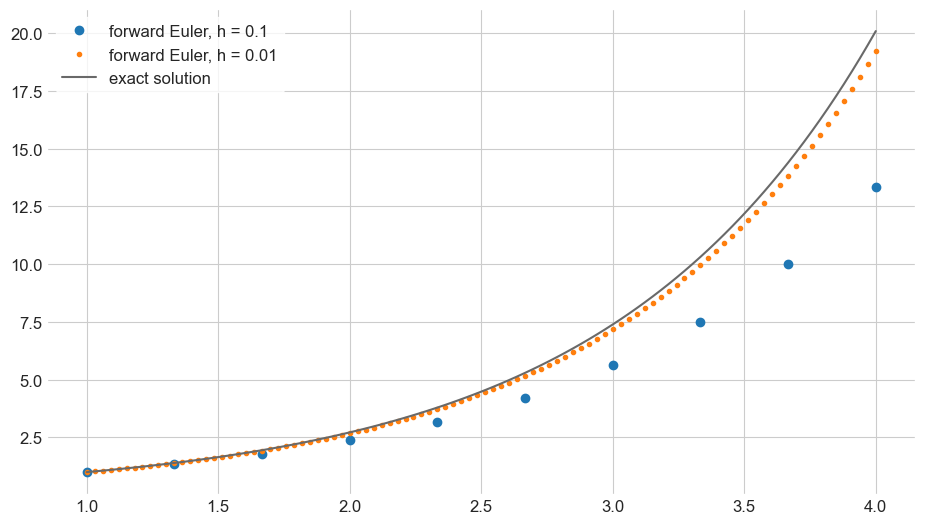

In [63]:
def f(t, y):
    return y

def exact(t):
    return np.exp(t-1)

y0 = 1
t1 = np.linspace(1, 4, 10)
t2 = np.linspace(1, 4, 100)

y1 = forwardEuler(f, y0, t1)
y2 = forwardEuler(f, y0, t2)

plt.plot(t1, y1, "o", label="forward Euler, h = 0.1")
plt.plot(t2, y2, ".", label="forward Euler, h = 0.01")
plt.plot(t2, exact(t2), color="dimgrey", label="exact solution")
plt.legend()
plt.show()

In [71]:
def error(exact, vals, t):
    '''Maxmimum norm'''
    return max(np.abs(exact(t) - vals).flatten())

def order(exact, vals1, vals2, t1, t2):
    '''Approximation of order of convergence'''
    a = error(exact, vals2, t2) / error(exact, vals1, t1)
    b = (t2[-1] - t2[0]) * len(t1) / (t1[-1] - t1[0]) / len(t2)
    return np.log(a) / np.log(b)

In [72]:
print(error(exact, y1, t1))
print(error(exact, y2, t2))
order(exact, y1, y2, t1 ,t2)

6.767241947828223
0.8752991972373501


0.8882551738401115

analyse

#### Test 2
Lotka-Volterra equations

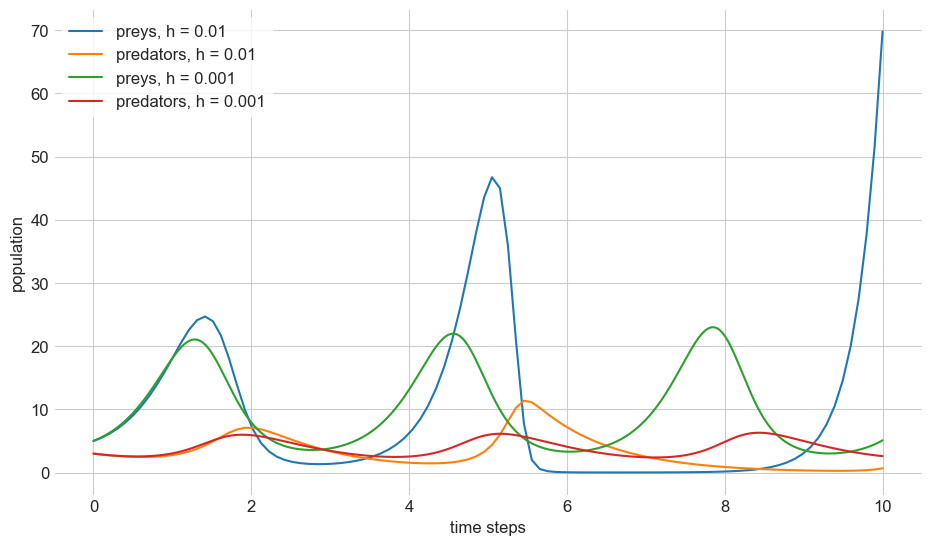

In [74]:
def g(t, y, a, b, c, d):
    return np.array([-(a - b * y[1]) * y[0], (c - d * y[0]) * y[1]])

def f(t, y):
    return g(t, y, 1, 0.1, 4, 1)

y0 = (3, 5)
t1 = np.linspace(0, 10, 100)
t2 = np.linspace(0, 10, 1000)

y1 = forwardEuler(f, y0, t1)
y2 = forwardEuler(f, y0, t2)

plt.plot(t1, y1[:, 1], label="preys, h = 0.01")
plt.plot(t1, y1[:, 0], label="predators, h = 0.01")
plt.plot(t2, y2[:, 1], label="preys, h = 0.001")
plt.plot(t2, y2[:, 0], label="predators, h = 0.001")
plt.xlabel("time steps")
plt.ylabel("population")
plt.legend()
plt.show()

beobachtungen